<a href="https://colab.research.google.com/github/Disha200345/Soil-Project/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: >

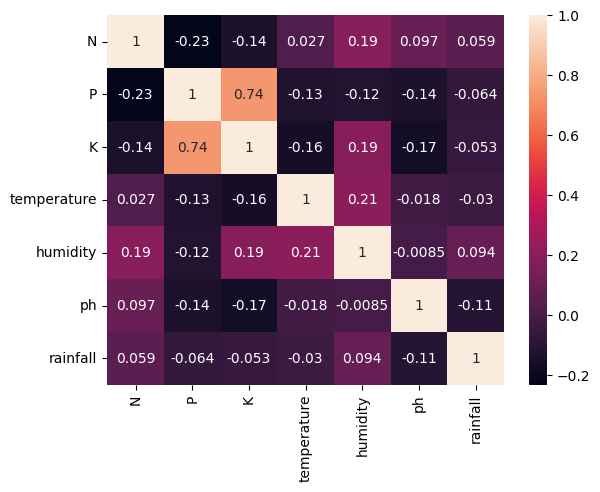

In [ ]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)

In [ ]:
grp=df.groupby(by='label').mean().reset_index()
grp

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


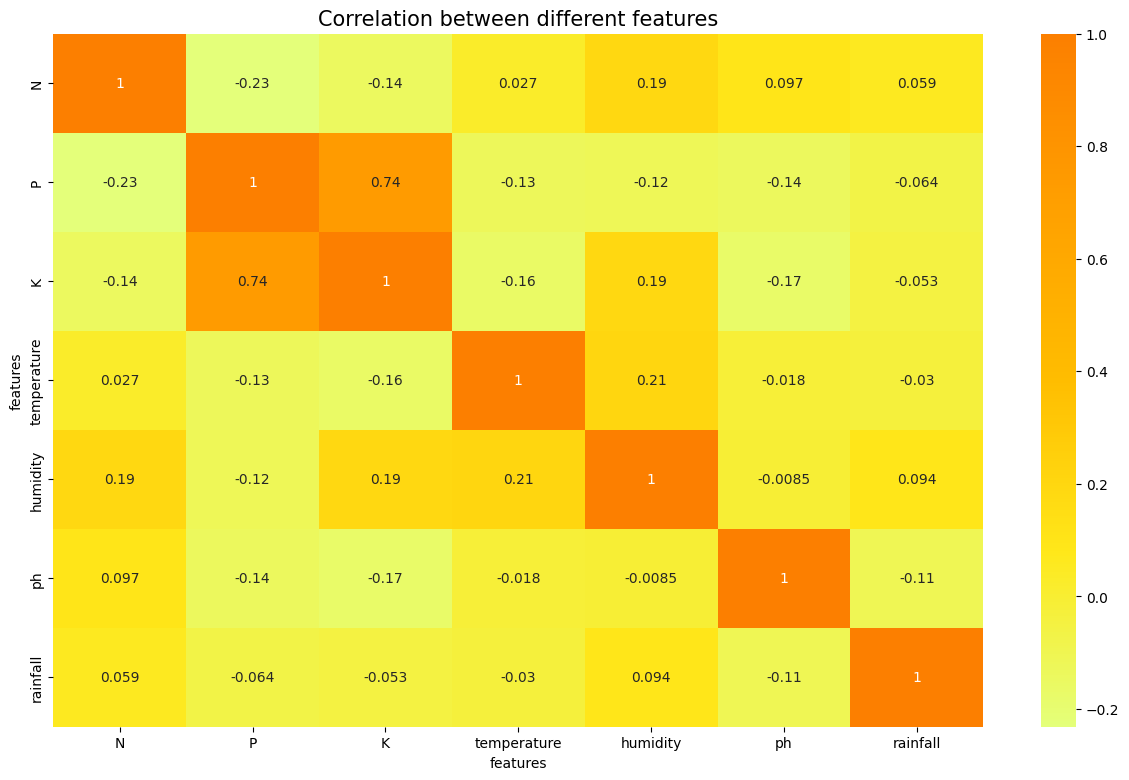

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
names=df['label'].unique()
encoder =LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
x=df.drop(['label'],axis=1)
y=df['label']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtrain=pd.DataFrame(xtrain,columns=x.columns)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
models={'Logistic Regression':LogisticRegression(),
        'Random Forest':RandomForestClassifier(),
        'Tree':DecisionTreeClassifier(),

       }
def fit_and_Score(models,xtrain,xtest,ytrain,ytest):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        model_score[name]=model.score(xtest,ytest)
    return model_score

In [ ]:
model_score= fit_and_Score(models,xtrain,xtest,ytrain,ytest)
model_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9636363636363636,
 'Random Forest': 1.0,
 'Tree': 0.990909090909091}

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']
acc = []
model = []

Cross Validation Score (Random Forest): [0.98737374 0.99494949 0.99242424 0.99747475 0.99494949]
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0
Confusion Matrix


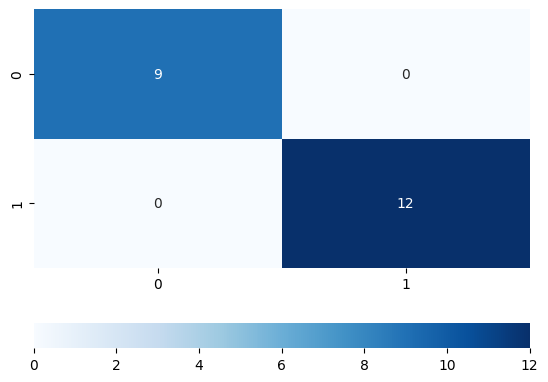

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

In [ ]:
# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(xtrain, ytrain)
# Cross-validation score calculation
score_rf = cross_val_score(model_rf, xtrain, ytrain, cv=5)
print("Cross Validation Score (Random Forest):", score_rf)
# Train and test accuracy
train_score_rf = model_rf.score(xtrain, ytrain)
test_score_rf = model_rf.score(xtest, ytest)
print("Random Forest Train Accuracy:", train_score_rf)
print("Random Forest Test Accuracy:", test_score_rf)
# Append accuracy and model name to lists
acc.append(test_score_rf)
model.append('Random Forest')
# Predictions and evaluation
y_pred_rf = model_rf.predict(xtest)
rf_acc = accuracy_score(y_pred_rf, ytest)
# Confusion matrix visualization
cm_rf = confusion_matrix(ytest, y_pred_rf, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_rf, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()
# Classification report printing
print(classification_report(ytest, y_pred_rf))
print('.:. Random Forest:'+'\033[1m {:.3f}%'.format(rf_acc*100)+' .:.')

In [ ]:
print(classification_report(ytest, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         9
          17       1.00    

In [ ]:
# New data for prediction
data1 = np.array([[90,42,43,20.879744,80.0027,6.5,202.9]])

# Make predictions using the trained Random Forest model
prediction1 = model_rf.predict(data1)
print("Prediction for data1:", prediction1)

Prediction for data1: [20]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
